In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
rider= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/Decision tree/RidingMowers.csv')
rider.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [37]:
%pip install dmba

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

In [39]:
import os
graph_path = 'C:/Users/mo0354/windows_10_msbuild_Release_graphviz-9.0.0-win32/Graphviz/bin'
os.environ["PATH"] += os.pathsep + graph_path

classes: Nonowner, Owner


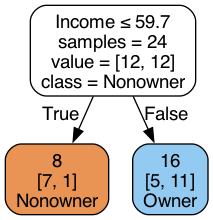

In [40]:
small= DecisionTreeClassifier(random_state=47, max_depth=1)
small.fit(rider.drop(columns=['Ownership']), rider['Ownership'])
print("classes: {}".format(', '.join(small.classes_)))
plotDecisionTree(small, feature_names= rider.columns[:2], class_names=small.classes_)


Classes: Nonowner, Owner


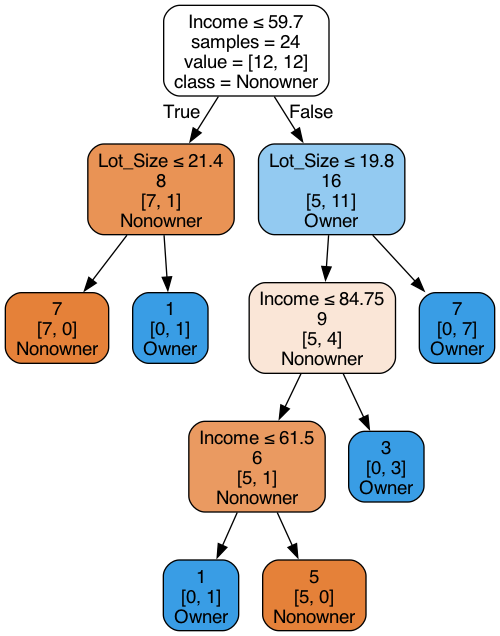

In [41]:
full= DecisionTreeClassifier(random_state=43)
full.fit(rider.drop(columns=['Ownership']), rider['Ownership'])
print("Classes: {}".format(', '.join(full.classes_)))
plotDecisionTree(full, feature_names= rider.columns[:2], class_names=full.classes_)

Decision Tree Structure	, Confusion Matrix and (Heatmap), Feature Importance Plot, ROC Curve & AUC, Practical Predictions.

In [42]:
bank= pd.read_csv('/Users/rajoad/Documents/GitHub/Practice-/Practice-/UniversalBank.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [43]:
#remove space in column names
bank.columns= bank.columns.str.replace(' ', '_')

In [44]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [45]:
bank= bank.drop(columns=['ID','ZIP_Code'])

In [46]:
bank.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


In [49]:

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

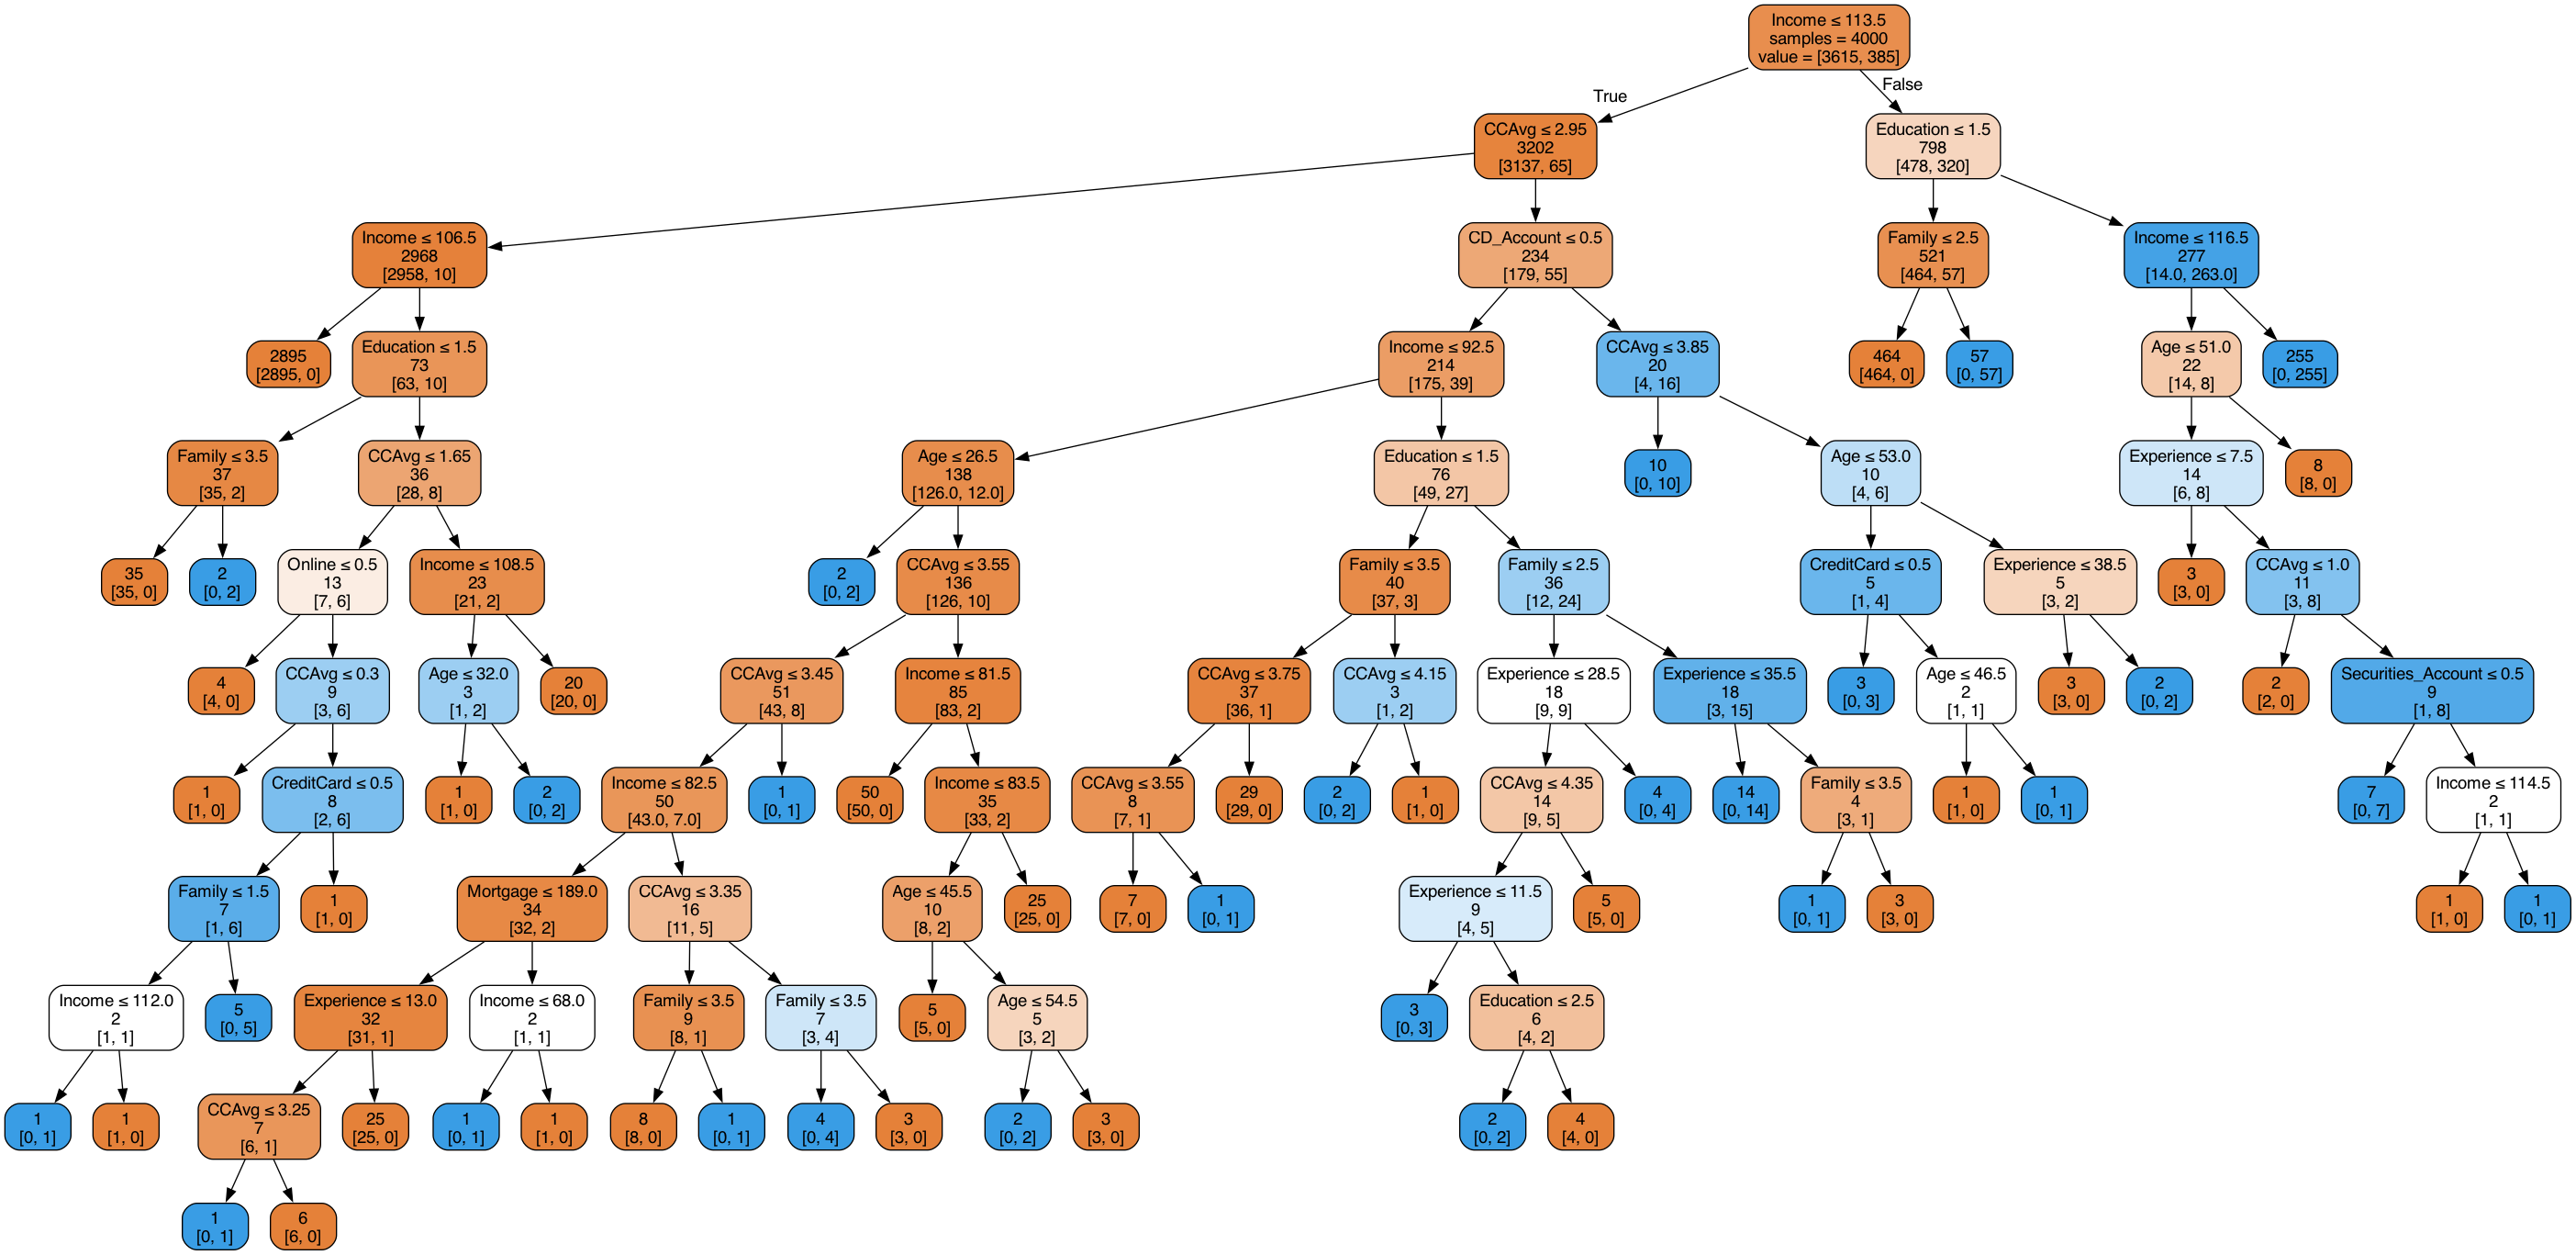

In [51]:
X= bank.drop(columns=['Personal_Loan'])
y= bank['Personal_Loan']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state= 45)

tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)
plotDecisionTree(tree, feature_names=X_train.columns)



In [56]:
print("train")
classificationSummary(y_train, tree.predict(X_train))
print("valid")
classificationSummary(y_valid, tree.predict(X_valid))


train
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 3615    0
     1    0  385
valid
Confusion Matrix (Accuracy 0.9830)

       Prediction
Actual   0   1
     0 901   4
     1  13  82


In [53]:
# Import additional required libraries
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import seaborn as sns


In [59]:
# Get predictions and probabilities
y_train_pred= tree.predict(X_train)
y_valid_pred= tree.predict(X_valid)
y_train_prob= tree.predict_proba(X_train)[:, 1]
y_valid_prob= tree.predict_proba(X_valid)[:, 1]

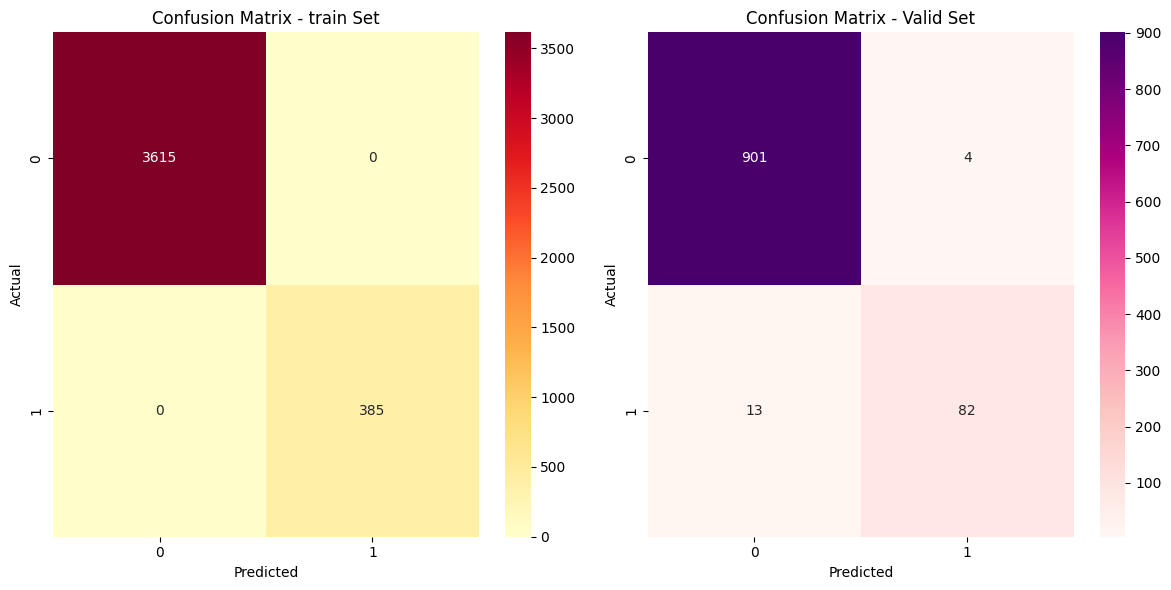

In [100]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

cm_train= confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap= 'YlOrRd', ax=ax1)
ax1.set_title("Confusion Matrix - train Set")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")


cm_valid= confusion_matrix(y_valid, y_valid_pred)
sns.heatmap(cm_valid, annot=True, fmt= 'd', cmap='RdPu', ax=ax2)
ax2.set_title("Confusion Matrix - Valid Set")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")
plt.tight_layout()


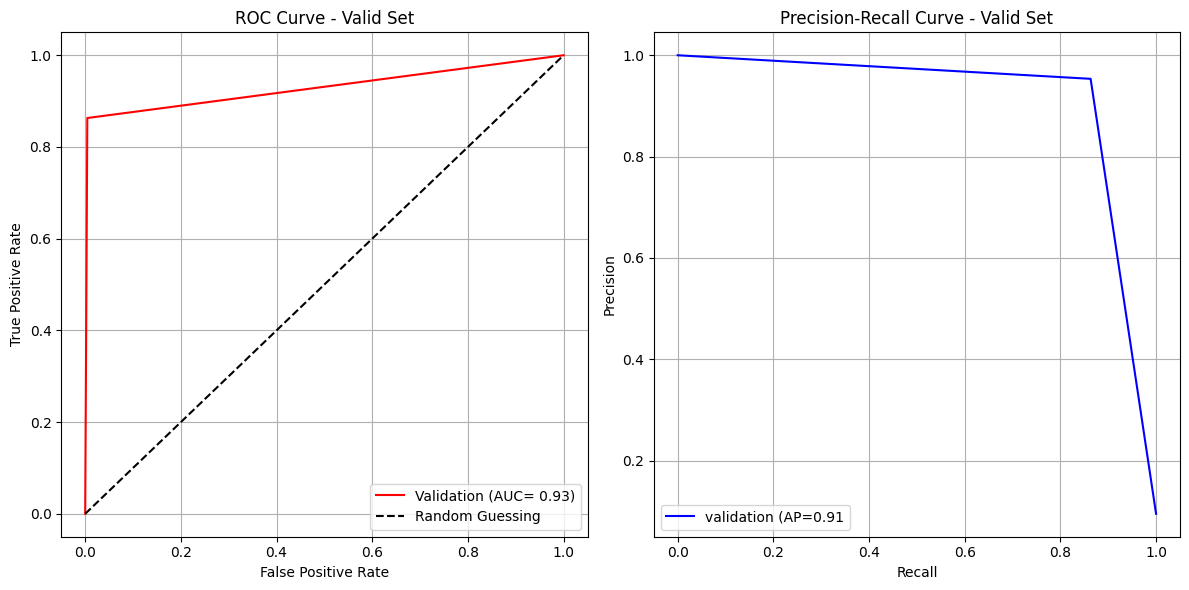

In [102]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(12,6))

fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob)
ax1.plot(fpr_valid, tpr_valid, 'r-', label= f'Validation (AUC= {auc(fpr_valid, tpr_valid):.2f})')
ax1.plot([0,1],[0,1], 'k--', label='Random Guessing')
ax1.set_title('ROC Curve - Valid Set')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc='lower right')
ax1.grid(True)

precision_valid, recall_valid, _ = precision_recall_curve(y_valid, y_valid_prob)
ax2.plot(recall_valid, precision_valid, 'b-', label=f'validation (AP={auc(recall_valid, precision_valid):.2f}')
ax2.set_title('Precision-Recall Curve - Valid Set')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc='lower left')
ax2.grid(True)
plt.tight_layout()
plt.show()

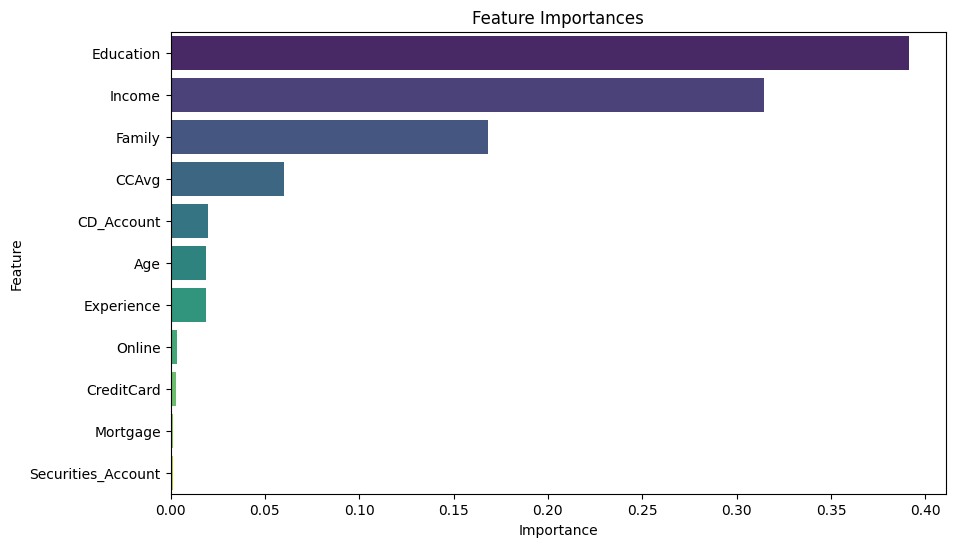

In [ ]:
importances= tree.feature_importances_


feature_importances= pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue= 'Feature', palette='plasma')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [81]:
sample_data = pd.DataFrame({
    'Age': [35, 50, 28, 45, 55],
    'Experience': [10, 25, 5, 20, 30],
    'Income': [60, 120, 40, 85, 150],
    'Family': [2, 4, 1, 3, 4],
    'CCAvg': [1.5, 3.0, 1.0, 2.5, 4.0],
    'Education': [2, 3, 1, 2, 3],
    'Mortgage': [0, 100, 0, 50, 200],
    'Securities_Account': [0, 1, 0, 1, 1],
    'CD_Account': [0, 1, 0, 0, 1],
    'Online': [1, 1, 1, 0, 1],
    'CreditCard': [1, 0, 1, 1, 1]
})

In [82]:
sample_data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,35,10,60,2,1.5,2,0,0,0,1,1
1,50,25,120,4,3.0,3,100,1,1,1,0
2,28,5,40,1,1.0,1,0,0,0,1,1
3,45,20,85,3,2.5,2,50,1,0,0,1
4,55,30,150,4,4.0,3,200,1,1,1,1


In [87]:
#predict
sample_predict= tree.predict(sample_data)
#display predictions
for i, pred in enumerate(sample_predict):
    print(f"sample {i+1} - Predicted Personal Loan: {'Yes' if pred == 1 else 'No'}")
#predict probabilities
sample_probabilities = tree.predict_proba(sample_data)[:, 1]
#display probabilities
for i, prob in enumerate(sample_probabilities):
    print(f"sample {i+1} - Probability of Personal Loan: {prob:.2f}")
    
          

sample 1 - Predicted Personal Loan: No
sample 2 - Predicted Personal Loan: Yes
sample 3 - Predicted Personal Loan: No
sample 4 - Predicted Personal Loan: No
sample 5 - Predicted Personal Loan: Yes
sample 1 - Probability of Personal Loan: 0.00
sample 2 - Probability of Personal Loan: 1.00
sample 3 - Probability of Personal Loan: 0.00
sample 4 - Probability of Personal Loan: 0.00
sample 5 - Probability of Personal Loan: 1.00
